# The best neighborhood in Pittsburgh

## Supermarkets & Convenience Stores


---

# By Lihan Wang
DataSet: https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores

In [43]:
#Let's get start by importing library
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt

---
### Import information about 90 neighborhoods.

POLYGON ((-79.905600781874 40.4552199607547, -79.90553381787289 40.4551913489724, -79.9054813177469 40.4552525789319, -79.9050342903863 40.4550699757495, -79.90455329001369 40.4548749760093, -79.9036842891784 40.4545409762304, -79.9032332890956 40.4543679757969, -79.9027692889252 40.4541999758805, -79.9013772884821 40.4536959759952, -79.90091428844271 40.4535289762417, -79.900658288741 40.4534349758325, -79.8998902881671 40.4531529758057, -79.89963428789829 40.4530599758356, -79.89882328736741 40.4527269758697, -79.89738928796631 40.4521739755158, -79.8966742867855 40.451891976133, -79.89596128684489 40.451614975535, -79.89482928620021 40.4511879753212, -79.8945862870612 40.451080975243, -79.89385728619069 40.4507589757396, -79.8936142865998 40.4506529754229, -79.8934692865889 40.4505569754489, -79.8927069299729 40.4503989460638, -79.8923759496974 40.4503512729333, -79.8923758461076 40.450351241522, -79.8924840065461 40.4498397708806, -79.8924876405223 40.4498226080585, -79.89318230367

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823


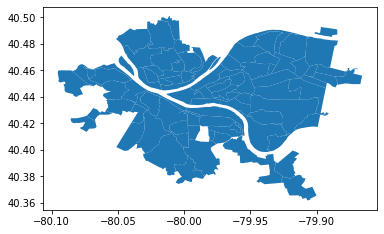

In [13]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
neighborhood=gpd.read_file('map.shp')

print(neighborhood["geometry"][0])
neighborhood.plot()
nb = pd.read_csv("map.csv")
nb.head(2)


---
### Import information about 104 playing field.

In [54]:
pf=pd.read_csv("playfield.csv")


---
### Since map.shp doesn't contain names of neighborhood, I get this information from map.csv and combine it with other information in playing field data frame.

In [16]:
n_data = pd.DataFrame()
n_data["Neighborhood"]=nb["hood"]
n_data["Geometry"] = neighborhood["geometry"]
n_data["playfield"]=0
n_data.sample(10)

,Neighborhood,Geometry,playfield
73,St. Clair,"POLYGON ((-79.96995 40.41188, -79.96932 40.411...",0
59,Point Breeze,"POLYGON ((-79.89319 40.44649, -79.89391 40.443...",0
9,Duquesne Heights,"POLYGON ((-80.01774 40.43972, -80.01783 40.439...",0
55,East Hills,"POLYGON ((-79.87523 40.45979, -79.87448 40.459...",0
58,Esplen,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",0
81,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0
53,Banksville,"POLYGON ((-80.02969 40.42127, -80.02976 40.419...",0
75,Shadyside,"POLYGON ((-79.92238 40.46055, -79.92208 40.460...",0
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",0
69,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",0


---
#### Now, I need to get the number of supermarkets in each Neighborhood.

In [18]:
from shapely.geometry import Point
cnt=0
for i,cur in pf.iterrows():
  
    pt=Point(cur["longitude"],cur["latitude"])
    found=False
    for j,nb in n_data.iterrows():
        if(nb["Geometry"].contains(pt)): 
            cnt+=1
            n_data.at[j,"playfield"]+=1
            
# print(neighborhood.head())
# neighborhood.plot(column='a',legend=True)
print(len(neighborhood))
n_data.sample(10)
# print(cnt)
# cn1

90


,Neighborhood,Geometry,playfield
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",6
57,West End,"POLYGON ((-80.02821 40.44427, -80.02821 40.444...",1
30,Allentown,"POLYGON ((-79.99679 40.42820, -79.99642 40.427...",1
41,Friendship,"POLYGON ((-79.93068 40.46350, -79.93072 40.463...",0
29,North Shore,"POLYGON ((-79.99529 40.44985, -79.99535 40.449...",0
32,Allegheny West,"POLYGON ((-80.00895 40.44996, -80.00894 40.449...",0
74,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",0
21,Lincoln-Lemington-Belmar,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",2
56,Central Lawrenceville,"POLYGON ((-79.95393 40.47731, -79.95381 40.477...",2
37,New Homestead,"POLYGON ((-79.91621 40.39849, -79.91621 40.398...",0


---

0     0
1     1
2     1
3     2
4     0
     ..
85    2
86    1
87    2
88    2
89    1
Name: playfield, Length: 90, dtype: int64


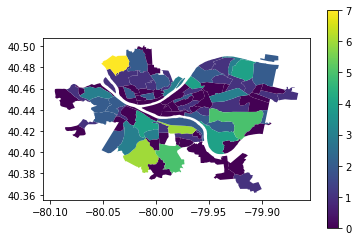

In [23]:
neighborhood["playfield"]=n_data["playfield"]
print(neighborhood["playfield"])
neighborhood.plot(column="playfield",legend=True)

,Neighborhood,Geometry,playfield
47,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",7
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",6
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",6
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",5
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",5
...,...,...,...
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",0
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",0
64,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",0
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",0


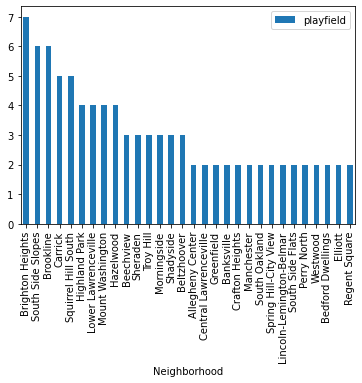

In [53]:
nb_pf=n_data.sort_values("playfield",ascending=False)
plt=nb_pf.iloc[:30].plot(kind='bar',x='Neighborhood',y='playfield')
ax.set_title("PlayingFields in Pittsburgh")

nb_pf